In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [3]:
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  
y = iris.target

X = X[y != 2]
y = y[y != 2]

In [4]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Create and train SVM model
model = SVC(kernel='linear')
model.fit(X_scaled, y)

SVC(kernel='linear')

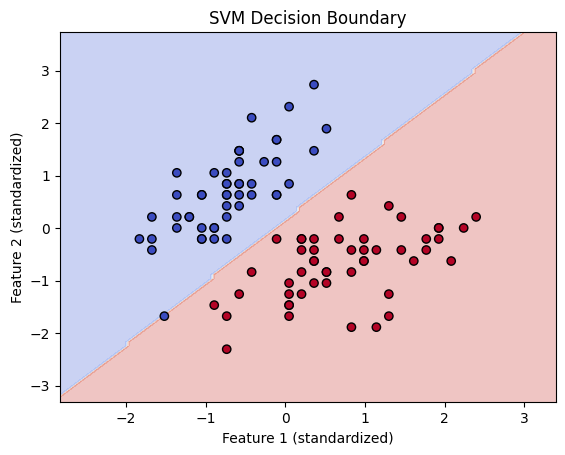

In [6]:
def simple_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    preds = preds.reshape(xx.shape)

    plt.contourf(xx, yy, preds, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='k')
    plt.xlabel("Feature 1 (standardized)")
    plt.ylabel("Feature 2 (standardized)")
    plt.title("SVM Decision Boundary")
    plt.show()

# Now call the function:
simple_decision_boundary(model, X_scaled, y)
